In [1]:
import os, shutil, pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import mlflow

2024-09-28 23:10:03.190885: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 23:10:03.293908: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 23:10:03.443173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 23:10:03.583774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 23:10:03.624649: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 23:10:03.820583: I tensorflow/core/platform/cpu_feature_gu

In [2]:
#mlflow.set_tracking_uri("http://localhost:5555")
mlflow.tensorflow.autolog()

mlflow.set_experiment("Clasificador binario de camisetas de futbol")
mlflow.set_experiment_tags(
    {
        "proyecto": "camisetas",
        "task": "Clasificacion",
    }
)
run = mlflow.start_run()

In [3]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [5]:
new_base_dir = pathlib.Path("dataset")

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

BATCHSIZE = 8
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=BATCHSIZE)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validate",
    image_size=(180, 180),
    batch_size=BATCHSIZE)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=BATCHSIZE)

Found 38 files belonging to 2 classes.
Found 9 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


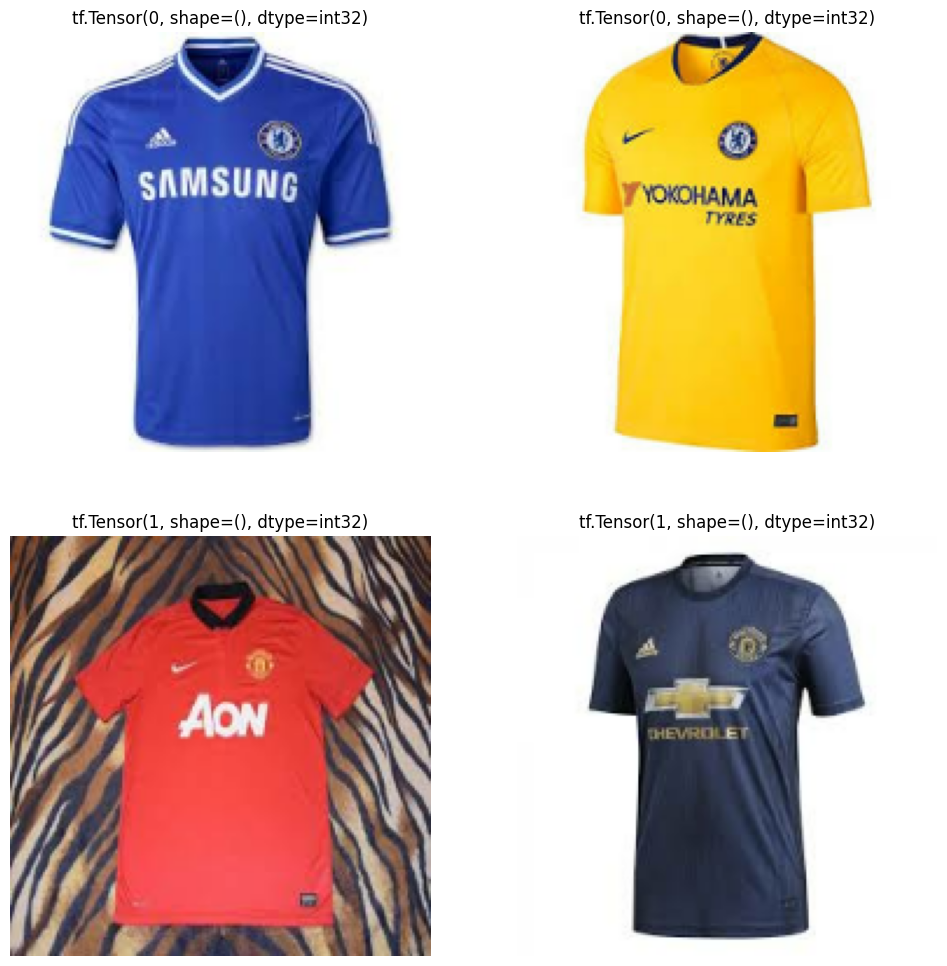

In [7]:
def plot_images(images,label):
    plt.figure(figsize=(12, 12))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(label[i]))
        plt.axis("off")
    plt.show()

train_images, train_labels = next(iter(train_dataset))
plot_images(train_images,train_labels)

In [8]:
params = {
            'epocas': 30,
            'lr' : 0.0001 
}

print(params['epocas'])

30


In [9]:
path = r'/home/gaby/Documents/CF_MLOps/Trabajo/cnn-classifier-jersey/fut_class/modelos/'
model_name = 'convnet_basics.keras'


params = {
            'epocas': 30,
            'lr' : 0.0001 
}

mlflow.log_params(params)


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = path + model_name,
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=params['epocas'],
    validation_data=validation_dataset,
    callbacks=callbacks)

2024-09-28 23:10:09.408502: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-28 23:10:09.511852: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5448 - loss: 1.4794

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 623ms/step - accuracy: 0.5418 - loss: 1.4554 - val_accuracy: 0.5556 - val_loss: 0.6637
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.5700 - loss: 0.6918

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.5715 - loss: 0.6949 - val_accuracy: 0.7778 - val_loss: 0.6078
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 547ms/step - accuracy: 0.6202 - loss: 0.5710 - val_accuracy: 0.6667 - val_loss: 0.6934
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6860 - loss: 0.6537

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step - accuracy: 0.6988 - loss: 0.6377 - val_accuracy: 0.7778 - val_loss: 0.4349
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.7404 - loss: 0.5369 - val_accuracy: 0.7778 - val_loss: 0.4507
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 553ms/step - accuracy: 0.8151 - loss: 0.4346 - val_accuracy: 0.6667 - val_loss: 0.4475
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.7974 - loss: 0.5634

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 589ms/step - accuracy: 0.7873 - loss: 0.5563 - val_accuracy: 0.7778 - val_loss: 0.4349
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - accuracy: 0.6778 - loss: 0.4846 - val_accuracy: 0.7778 - val_loss: 0.5330
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.6578 - loss: 0.8170

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.6710 - loss: 0.7848 - val_accuracy: 0.7778 - val_loss: 0.3994
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.7245 - loss: 0.4235

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.7265 - loss: 0.4252 - val_accuracy: 0.7778 - val_loss: 0.3508
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 525ms/step - accuracy: 0.8515 - loss: 0.5661 - val_accuracy: 0.8889 - val_loss: 0.5703
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.9302 - loss: 0.5255 - val_accuracy: 0.6667 - val_loss: 0.5099
Epoch 13/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 575ms/step - accuracy: 0.7141 - loss: 0.4291 - val_accuracy: 0.8889 - val_loss: 0.3858
Epoch 14/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step - accuracy: 0.9163 - loss: 0.3886 - val_accuracy: 0.7778 - val_loss: 0.3595
Epoch 15/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.8830 - loss: 0.2566

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 600ms/step - accuracy: 0.8762 - loss: 0.2633 - val_accuracy: 1.0000 - val_loss: 0.2294
Epoch 16/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 601ms/step - accuracy: 0.9547 - loss: 0.2606 - val_accuracy: 0.8889 - val_loss: 0.2803
Epoch 17/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.9912 - loss: 0.1316 - val_accuracy: 0.7778 - val_loss: 0.3013
Epoch 18/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 571ms/step - accuracy: 0.8435 - loss: 0.6770 - val_accuracy: 0.8889 - val_loss: 0.5395
Epoch 19/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 596ms/step - accuracy: 0.9599 - loss: 0.0945 - val_accuracy: 0.8889 - val_loss: 0.2698
Epoch 20/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - accuracy: 0.9599 - loss: 0.1092 - val_accuracy: 0.8889 - val_loss: 0.8651
Epoch 21/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 552ms/step - accuracy: 0.8747 - loss: 0.1326 - val_accuracy: 0.8889 - val_loss: 0.5515
Epoch 22/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 592ms/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 0.8889 - val_loss: 1.6

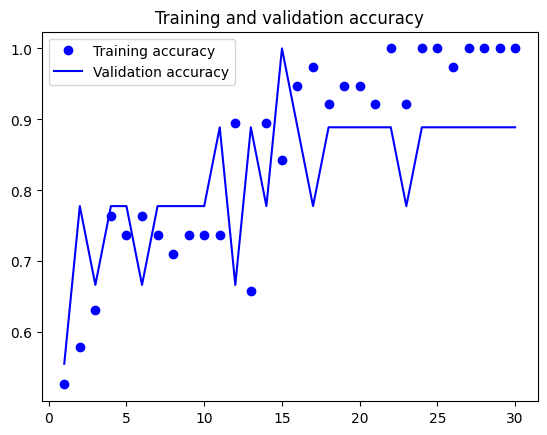

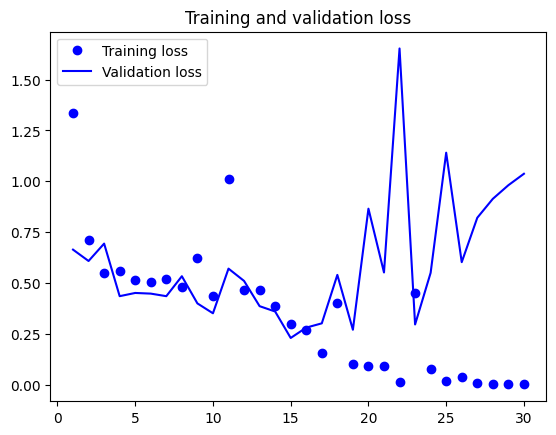

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [12]:
modelpath = path + model_name
test_model = keras.models.load_model(modelpath)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5417 - loss: 0.6702
Test accuracy: 0.500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Esta imagen es 50.00% equipo 1 y 50.00% equipo 2.


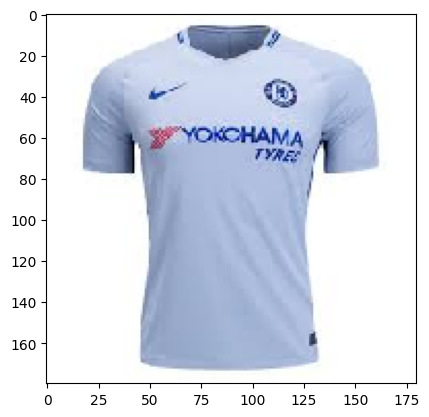

In [13]:
img = keras.utils.load_img("/home/gaby/Documents/CF_MLOps/Trabajo/cnn-classifier-jersey/fut_class/dataset/test/chelsea/ch_8.jpg", target_size=(180, 180))
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"Esta imagen es {100 * (1 - score):.2f}% equipo 1 y {100 * score:.2f}% equipo 2.")


In [14]:
mlflow.end_run()